# Generating Rest Frame SEDs from a Parametric Galaxy

Building on the `make_sfzh` documents we can now see how to generate a galaxy and produce its rest-frame spectral energy distribution.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from synthesizer.abundances.abundance_patterns import ElementDefinitions
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric import SFH, ZDist, Stars
from synthesizer.parametric.galaxy import Galaxy
from unyt import yr, Myr, Angstrom, Msun, c
from astropy.cosmology import Planck18 as cosmo


# used for its nice colour maps
import cmasher as cmr

In [2]:
# set style
plt.style.use('../../matplotlibrc.txt')

Initialise grid

In [3]:
grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0_cloudy-c23.01-sps'

grid = Grid(grid_name, grid_dir=grid_dir)

Next we can define the star formation and metal enrichment history:

In [4]:



# A simple function to generate a galaxy and reprocessed sed for a given star formation duration 
def generate_galaxy(sf_duration):

    # define the functional form of the star formation and metal enrichment histories
    sfh = SFH.Constant(duration=sf_duration)  # constant star formation
    metal_dist = ZDist.DeltaConstant(log10metallicity=-2.0)  # constant metallicity

    # get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
    stars = Stars(
        grid.log10age,
        grid.metallicity,
        sf_hist=sfh,
        metal_dist=metal_dist,
        initial_mass=10**8,
    )

    galaxy = Galaxy(stars)
    
    return galaxy

In [5]:
galaxy = generate_galaxy(10 * Myr)
sed = galaxy.stars.get_spectra_reprocessed(grid)

Let's make a plot of the UV - NIR incident, total, and nebular spectra and save it

/Users/sw376/Dropbox/Research/projects/synthesizer-lines/venv/lib/python3.10/site-packages/unyt/array.py:1813: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_73077/1022340879.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


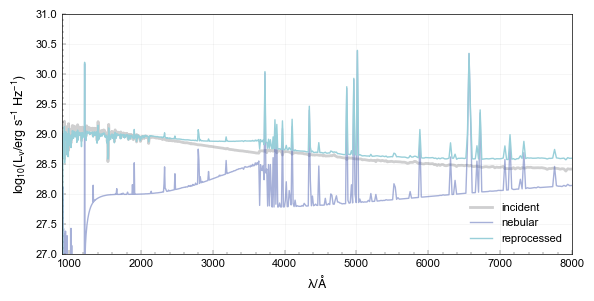

In [6]:

cmap = 'cmr.sapphire'

spectra_to_plot = ['incident', 'nebular', 'reprocessed']

# get colours to use
colours = cmr.take_cmap_colors(cmap, len(spectra_to_plot), cmap_range=(0.1,0.9))

fig = plt.figure(figsize=(6.0, 3.))

bottom = 0.15
height = 0.8
left = 0.1
width = 0.85

ax = fig.add_axes((left, bottom, width, height))


# incident 
spectra_id = 'incident'
sed = galaxy.stars.spectra[spectra_id]
ax.plot(sed.lam, np.log10(sed.lnu), c=colours[0], lw=2, label = spectra_id, alpha=0.2)

# nebular 
spectra_id = 'nebular'
sed = galaxy.stars.spectra[spectra_id]
ax.plot(sed.lam, np.log10(sed.lnu), c=colours[1], lw=1, label = spectra_id, alpha=0.5)

# reprocessed 
spectra_id = 'reprocessed'
sed = galaxy.stars.spectra[spectra_id]
ax.plot(sed.lam, np.log10(sed.lnu), c=colours[2], lw=1, label = spectra_id, alpha=1.0)


ax.legend(fontsize=8)
ax.set_xlim([900., 8000.])
ax.set_ylim([27., 31.])
# ax.set_xscale('log')

ax.set_xlabel(r'$\rm \lambda/\AA$')
ax.set_ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1})$')

fig.savefig('parametric_sed.pdf')
fig.show()


# Line emission

Let's now focus explictly on the line emission.

In [7]:
line_ids = [
    "H 1 4862.69A",
    "O 3 4958.91A",
    "O 3 5006.84A",
    ["O 3 4958.91A", "O 3 5006.84A"],
]

lines = galaxy.stars.get_line_intrinsic(grid, line_ids)
print(lines)

----------
LINE COLLECTION
lines: ['H 1 4862.69A' 'O 3 4958.91A' 'O 3 4958.91A,O 3 5006.84A' 'O 3 5006.84A']
available ratios: ['R3']
available diagrams: []
----------


In [8]:
lines = galaxy.stars.get_line_intrinsic(grid, line_ids = grid.available_lines)
print(lines)


----------
LINE COLLECTION
lines: ['N 3 991.511A' 'C 2 1037.02A' 'Si 2 1179.59A' 'Si 2 1194.50A'
 'Si 2 1197.39A' 'Si 3 1206.50A' 'H 1 1215.67A' 'Si 2 1265.00A'
 'O 3 1666.15A' 'Si 3 1882.71A' 'Si 3 1892.03A' 'C 3 1906.68A'
 'C 3 1908.73A' 'C 2 2325.40A' 'C 2 2326.93A' 'Fe 2 2382.04A'
 'O 2 2470.34A' 'Fe 4 2567.61A' 'Fe 2 2625.67A' 'Al 2 2660.35A'
 'Mg 2 2795.53A' 'Mg 2 2802.71A' 'Fe 4 2829.36A' 'Fe 4 2835.74A'
 'Fe 4 3094.96A' 'O 2 3726.03A' 'O 2 3728.81A' 'H 1 3836.47A'
 'Ne 3 3868.76A' 'H 1 3890.15A' 'Ne 3 3967.47A' 'H 1 3971.19A'
 'H 1 4102.89A' 'H 1 4341.68A' 'O 3 4363.21A' 'Fe 3 4658.01A'
 'Fe 3 4701.62A' 'H 1 4862.69A' 'Fe 3 4881.12A' 'O 3 4958.91A'
 'O 3 5006.84A' 'Fe 3 5270.40A' 'Cl 3 5517.71A' 'O 1 6300.30A'
 'S 3 6312.06A' 'N 2 6548.05A' 'H 1 6564.62A' 'N 2 6583.45A'
 'S 2 6716.44A' 'S 2 6730.82A' 'Ar 3 7135.79A' 'Ca 2 7291.47A'
 'Ar 3 7751.11A' 'S 3 9068.62A' 'H 1 9231.50A' 'S 3 9530.62A'
 'H 1 9548.54A' 'H 1 1.00521m' 'H 1 1.09410m' 'H 1 1.28215m'
 'H 1 1.81790m' 'H 1 1.87

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_73077/1546153744.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(line.wavelength, np.log10(line.ew), c=colour, s=20, alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


----------
SUMMARY OF N 3 991.511A
wavelength: 991.5 Å
log10(luminosity/erg/s): 40.29
equivalent width: 0 Å
----------
----------
SUMMARY OF C 2 1037.02A
wavelength: 1037.0 Å
log10(luminosity/erg/s): 40.23
equivalent width: 0 Å
----------
----------
SUMMARY OF Si 2 1179.59A
wavelength: 1179.6 Å
log10(luminosity/erg/s): 40.20
equivalent width: 0 Å
----------
----------
SUMMARY OF Si 2 1194.50A
wavelength: 1194.5 Å
log10(luminosity/erg/s): 40.22
equivalent width: 0 Å
----------
----------
SUMMARY OF Si 2 1197.39A
wavelength: 1197.4 Å
log10(luminosity/erg/s): 40.14
equivalent width: 0 Å
----------
----------
SUMMARY OF Si 3 1206.50A
wavelength: 1206.5 Å
log10(luminosity/erg/s): 40.36
equivalent width: 0 Å
----------
----------
SUMMARY OF H 1 1215.67A
wavelength: 1215.7 Å
log10(luminosity/erg/s): 43.13
equivalent width: 81 Å
----------
----------
SUMMARY OF Si 2 1265.00A
wavelength: 1265.0 Å
log10(luminosity/erg/s): 40.16
equivalent width: 0 Å
----------
----------
SUMMARY OF O 3 1666.15A


/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_73077/1546153744.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


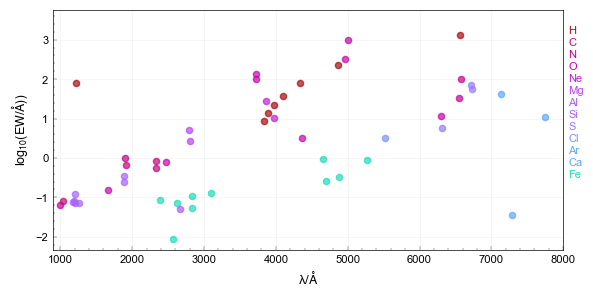

In [9]:

# normalising function to allow us to colour by atomic number
norm = Normalize(vmin=0, vmax=70)

# cmap to use 
cmap = cmr.neon

fig = plt.figure(figsize=(6.0, 3.))

bottom = 0.15
height = 0.8
left = 0.1
width = 0.85

ax = fig.add_axes((left, bottom, width, height))


elements = []

for i, line in enumerate(lines):

    print(line)

    elements.append(line.element)

    atomic_number = ElementDefinitions.A[line.element]

    colour = cmap(norm(atomic_number))

    ax.scatter(line.wavelength, np.log10(line.ew), c=colour, s=20, alpha=0.7)
    
# create set of elements to eliminate duplicates
elements = np.array(list(set(elements)))

# get list of atomic numbers
atomic_numbers = np.array([ElementDefinitions.A[element] for element in elements])

# sort elements by atomic number
args = np.argsort(atomic_numbers)
elements = elements[args]
atomic_numbers = atomic_numbers[args]

# Add elements labels on right
for i, (element, atomic_number) in enumerate(zip(elements, atomic_numbers)):
    ax.text(1.01,
            0.9-0.05*i, 
            element,
            fontsize=8,
            color=cmap(norm(atomic_number)),
            transform=ax.transAxes)


ax.legend(fontsize=8)
ax.set_xlim([900., 8000.])
# ax.set_ylim([27., 31.])
# ax.set_xscale('log')

ax.set_xlabel(r'$\rm \lambda/\AA$')
ax.set_ylabel(r'$\rm log_{10}(EW/\AA))$')

fig.savefig('parametric_ew.pdf')
fig.show()

## BPT

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_73077/2642387920.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


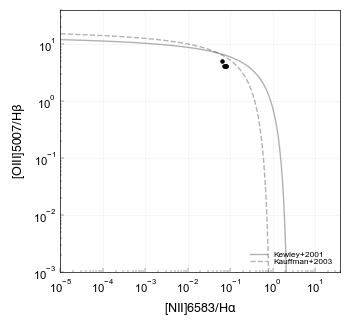

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from synthesizer.grid import Grid
from synthesizer.line import (
    LineRatios,
    get_ratio_label,
    get_diagram_labels,
    get_bpt_kewley01,
    get_bpt_kauffman03)
import cmasher as cmr
import line_labels


for diagram_id in ['BPT-NII']:

    fig = plt.figure(figsize=(3.5, 3.5))
    left = 0.15
    height = 0.75
    bottom = 0.15
    width = 0.8
    ax = fig.add_axes((left, bottom, width, height))


    # plot Kewley and Kauffmann lines 
    for f, ls, limit, label in zip([get_bpt_kewley01, get_bpt_kauffman03],
                                   ['-', '--'],
                                   [0.47, 0.05],
                                   ['Kewley+2001', 'Kauffman+2003']):
        log10x = np.arange(-5., limit, 0.01)
        ax.plot(10**log10x, 10**f(log10x), ls=ls, lw=1, c='k', alpha=0.3, label=label)


    for sf_timescale in [1, 5, 10, 100, 1000]:
        galaxy = generate_galaxy(sf_timescale * Myr)
        lines = galaxy.stars.get_line_intrinsic(grid, line_ids = grid.available_lines)
        
        # plot parametric galaxy
        x_, y_ = lines.get_diagram(diagram_id)
        ax.scatter(x_, y_, marker='o', s=5, color='k')

    

    ax.set_xlim([0.00001, 40])
    ax.set_ylim([0.001, 40])
    ax.set_xscale('log')
    ax.set_yscale('log')


    xlabel, ylabel = get_diagram_labels(diagram_id)

    ax.set_xlabel(rf'${xlabel}$')
    ax.set_ylabel(rf'${ylabel}$')


    ax.legend(loc='lower right', fontsize=6, labelspacing=0.0)

    fig.savefig(f'parametric_{diagram_id}.pdf')
    fig.show()

Make a plot of H$\alpha$ EW and H$\alpha$/UV ratio as a function of duration of star formation

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_73077/4091481977.py:82: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


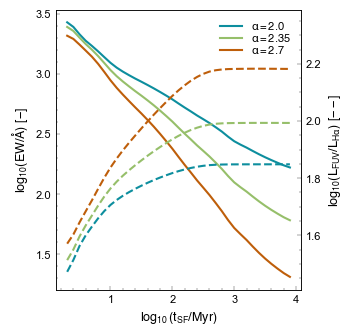

In [11]:

# Define FUV filter
tophat_dict = {
    "FUV": {"lam_min": 1400, "lam_max": 1600},
}

filters = FilterCollection(tophat_dict=tophat_dict, new_lam=grid.lam)


# List of grids to loop over
# NOTE: replace with SPS variant
grid_info = [
    ['bpass-2.2.1-bin_bpl-0.1,1.0,100.0-1.3,2.0_cloudy-c23.01-fixed', r'\alpha=2.0'],
    ['bpass-2.2.1-bin_bpl-0.1,1.0,100.0-1.3,2.35_cloudy-c23.01-fixed', r'\alpha=2.35'],
    ['bpass-2.2.1-bin_bpl-0.1,1.0,100.0-1.3,2.7_cloudy-c23.01-fixed', r'\alpha=2.7']
]
                                                              
colours = cmr.take_cmap_colors('cmr.infinity', len(grid_info), cmap_range=(0.3, 0.7))

star_formation_durations = np.arange(0.3, 4., 0.1)


# initialise figure
fig = plt.figure(figsize=(3.5, 3.5))

bottom = 0.15
height = 0.8
left = 0.15
width = 0.7

ax = fig.add_axes((left, bottom, width, height))
ax2 = ax.twinx()

for (grid_name, grid_label), colour in zip(grid_info, colours):

    # load grid
    grid = Grid(grid_name, grid_dir=grid_dir)

    # empty lists of quantities we want
    luninosity_ratio = np.empty(star_formation_durations.shape) 
    halpha_equivalent_widths = np.empty(star_formation_durations.shape) 

    for i, star_formation_duration in enumerate(star_formation_durations):

        # generate galaxy
        galaxy = generate_galaxy(10**star_formation_duration * Myr)

        # generate SED
        sed = galaxy.stars.get_spectra_reprocessed(grid)
        photometry = galaxy.stars.spectra["reprocessed"].get_photo_luminosities(filters)

        # generate lines
        lines = galaxy.stars.get_line_intrinsic(grid, ['H 1 6564.62A'])

        luninosity_ratio[i] = (c*photometry['FUV']/filters['FUV'].pivwv())/lines['H 1 6564.62A'].luminosity
        halpha_equivalent_widths[i] = lines['H 1 6564.62A'].ew

    # plot both quantities
    ax.plot(star_formation_durations, 
            np.log10(halpha_equivalent_widths), 
            c=colour, 
            ls='-', 
            label=rf'${grid_label}$')
    ax2.plot(star_formation_durations, 
             np.log10(luninosity_ratio), 
             c=colour, 
             ls='--')

ax.legend(fontsize=8, labelspacing=0.0)
# ax.set_xlim([900., 8000.])
ax2.set_ylim([1.41, 2.39])
# ax.set_xscale('log')

ax.grid(False)
ax2.grid(False)

ax.set_xlabel(r'$\rm \log_{10}(t_{SF}/Myr)$')
ax.set_ylabel(r'$\rm log_{10}(EW/\AA)\ [-]$')

ax2.set_ylabel(r'$\rm log_{10}(L_{FUV}/L_{H\alpha})\ [--]$')

fig.savefig('parametric_ew_sf.pdf')
fig.show()